In [1]:
# libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [2]:
# reading and displaying the dataset
df1=pd.read_csv(r'C:/Users/Gowsik/Downloads/marketprophecy-main/marketprophecy-main/BTC USD/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400


In [3]:
# taking open column in a dataset and doing prediction
training=df1.iloc[:,1:2].values
training

array([[  430.721008],
       [  434.622009],
       [  433.578003],
       ...,
       [46490.605469],
       [47169.371094],
       [46311.746094]])

In [4]:
# performing Normalization
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
train_scaled=s.fit_transform(training)



In [5]:
# taking 60 as time steps
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

In [6]:
# converting the train data's to arrays
x_train=np.array(x_train)
y_train=np.array(y_train)

In [7]:
# performing reshape operation
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [8]:
# Model Building and compiling
regressor=Sequential()
regressor.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.summary()
regressor.compile(loss='mean_squared_error',optimizer='Adam')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

38/38 [==============================] - 4s 99ms/step - loss: 8.2902e-05
Epoch 79/100
38/38 [==============================] - 4s 99ms/step - loss: 1.0516e-04
Epoch 80/100
38/38 [==============================] - 4s 99ms/step - loss: 1.0899e-04
Epoch 81/100
38/38 [==============================] - 4s 99ms/step - loss: 7.8045e-05
Epoch 82/100
38/38 [==============================] - 4s 99ms/step - loss: 1.0335e-04
Epoch 83/100
38/38 [==============================] - 4s 100ms/step - loss: 7.2108e-05
Epoch 84/100
38/38 [==============================] - 4s 103ms/step - loss: 9.0689e-05
Epoch 85/100
38/38 [==============================] - 4s 99ms/step - loss: 9.0949e-05
Epoch 86/100
38/38 [==============================] - 4s 99ms/step - loss: 8.8040e-05
Epoch 87/100
38/38 [==============================] - 4s 99ms/step - loss: 1.3214e-04
Epoch 88/100
38/38 [==============================] - 4s 99ms/step - loss: 7.6666e-05
Epoch 89/100
38/38 [==============================] - 4s 99ms/ste

In [9]:
# reading and displaying test data using pandas
df2=pd.read_csv(r'C:/Users/Gowsik/Downloads/marketprophecy-main/marketprophecy-main/BTC USD/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
5,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
6,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
7,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
8,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
9,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


In [41]:
# taking open column alone into consideration
test=df2['Open']
test.shape
print(test)

0     46311.746094
1     47680.925781
2     47343.542969
3     46458.851563
4     45899.359375
5     43565.511719
6     43153.570313
7     41561.464844
8     41734.726563
9     41910.230469
10    41819.507813
11    42742.179688
12    43946.742188
13    42598.871094
14    43101.898438
15    43172.039063
16    43118.121094
17    42250.074219
18    42374.039063
19    41744.027344
20    40699.605469
21    36471.589844
22    35047.359375
23    36275.734375
24    36654.804688
25    36950.515625
26    36841.878906
27    37128.445313
28    37780.714844
29    38151.917969
30    37920.281250
31    38481.765625
32    38743.714844
33    36944.804688
34    37234.058594
Name: Open, dtype: float64


In [11]:
# concatenation of train and test data for the open column
real=pd.concat((df1['Open'],df2['Open']),axis=0)
real.shape

(2228,)

In [12]:
# checking the shape of the inputs
inputs=real[len(real)-len(test)-60:].values
inputs.shape

(95,)

In [13]:
# Reshaping the inputs
inputs=inputs.reshape(-1,1)
inputs.shape

(95, 1)

In [36]:
# performing Normalization
inputs1=s.transform(inputs)

In [40]:
# predicting the output
x_test=[]
for i in range(60,95):
    x_test.append(inputs1[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
result=regressor.predict(x_test)
result1=s.inverse_transform(result)
print(result1.shape)
print(test.shape)
print(result1)
print(test)

(35, 1)
(35,)
[[44154.457]
 [44119.664]
 [44982.965]
 [45256.164]
 [44683.848]
 [43983.746]
 [42362.016]
 [41369.684]
 [40273.234]
 [39954.37 ]
 [40142.44 ]
 [40305.69 ]
 [40895.668]
 [41908.168]
 [41591.746]
 [41457.273]
 [41479.797]
 [41481.105]
 [40990.82 ]
 [40778.645]
 [40421.74 ]
 [39687.953]
 [37095.566]
 [34895.332]
 [34640.098]
 [35250.4  ]
 [35905.195]
 [36159.684]
 [36323.004]
 [36707.62 ]
 [37110.33 ]
 [37148.645]
 [37367.56 ]
 [37644.58 ]
 [36821.156]]
0     46311.746094
1     47680.925781
2     47343.542969
3     46458.851563
4     45899.359375
5     43565.511719
6     43153.570313
7     41561.464844
8     41734.726563
9     41910.230469
10    41819.507813
11    42742.179688
12    43946.742188
13    42598.871094
14    43101.898438
15    43172.039063
16    43118.121094
17    42250.074219
18    42374.039063
19    41744.027344
20    40699.605469
21    36471.589844
22    35047.359375
23    36275.734375
24    36654.804688
25    36950.515625
26    36841.878906
27    37128.44531

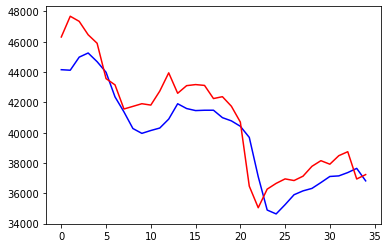

In [23]:
# plotting graphs for the predicted values and the actual values
plt.plot(result1,color='blue',label='predicted')
plt.plot(test,color='red',label='actual')
plt.legend
plt.show()

In [76]:
# Displaying the actual and predicted values in a dataframe format
df100=df2[['Date','Open']]
df101=pd.DataFrame(result1)
df102=pd.concat([df100,df101],axis=1)
df102.rename(columns={0:'Predicted_value'},inplace=True)
df102


,Date,Open,Predicted_value
0,2022-01-01,46311.746094,44154.457031
1,2022-01-02,47680.925781,44119.664062
2,2022-01-03,47343.542969,44982.964844
3,2022-01-04,46458.851563,45256.164062
4,2022-01-05,45899.359375,44683.847656
5,2022-01-06,43565.511719,43983.746094
6,2022-01-07,43153.570313,42362.015625
7,2022-01-08,41561.464844,41369.683594
8,2022-01-09,41734.726563,40273.234375
9,2022-01-10,41910.230469,39954.371094


In [ ]:
# the same methodology can be used for other columns(close,high,low etc.) to predict the output
# here I have taken 60 as time steps to predict the output for the open column.